In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
n = 8
lunch_arr = np.zeros((n,n))
for i in range(n):
    lunch_arr[i,i] = 1

# we are done when at least one row is all 1s (anyone) and when all rows are all 1s (everyone)
lunch_arr

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [16]:
def gen_rand_pair_table(people):
    """
    given a number of people, generate all possible unique lunch combinations
    """
    pass

def gen_pair_idxs(lunch_arr):
    n = lunch_arr.shape[0]
    
    while True:    
        # generate random pairs to go to lunch
        pairs = np.random.permutation(range(n))
        print(pairs)
        
        # check for at least one unique pair
        for idx in range(0, n, 2):
            idx2 = idx + 1
            
            # there is a valid pair
            print(lunch_arr[idx2, idx])
            print(lunch_arr[idx, idx2])
            if lunch_arr[idx, idx2] == 0 or lunch_arr[idx2, idx] == 0:
                return pairs
            
        print(lunch_arr)
        
    

gen_pair_idxs(lunch_arr)

[4 0 5 3 7 1 6 2]
0.0
0.0


array([4, 0, 5, 3, 7, 1, 6, 2])

In [17]:
def anyone_winner(lunch_arr):
    n = lunch_arr.shape[0]
    for i in range(n):
        if np.sum(lunch_arr[i, :]) == n:
            return True
    return False

test_winner = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 1, 0],
])

test_no_winner = np.array([
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 1, 0],
])

print(anyone_winner(test_winner))
print(anyone_winner(test_no_winner))

True
False


In [18]:
def days_anyone_wins(lunch_arr):
    days = 0
    # while not anyone_winner(lunch_arr):
    return 1
    for _ in range(5):
        pairs = gen_pair_idxs(lunch_arr)
        print("after pairs ", days)
        for idx in range(0, n, 2):
            idx2 = idx + 1

            # mark indices as eaten with each other
            lunch_arr[idx, idx2] = 1
            lunch_arr[idx2, idx] = 1

        days += 1
    return days


def sim_days_anyone(people, sample=10_000):    
    total_days = 0
    for _ in range(sample):
        # set the initial lunch array
        lunch_arr = np.zeros((people, people))
        for i in range(people):
            lunch_arr[i,i] = 1
        
        # add the number of days it took to get a winner
        total_days += days_anyone_wins(lunch_arr)
    return total_days / sample 

In [19]:
sim_days_anyone(8, sample=1)

1.0

In [34]:
# 8 people get lunch in pairs (4 pairs) every day, how many days on average will it take until one person has had lunch with everyone else?
def is_new_pair(pairs, visited):
    for idx in range(0, len(pairs), 2):
        p1 = pairs[idx]
        p2 = pairs[idx+1]
        if visited[p1][p2] == 0 or visited[p2][p1] == 0:
            return True
    return False

def anyone_with_everyone(lunch_dates: dict):
    for k, v in lunch_dates.items():
        if sum(v) == len(lunch_dates):
            return True
    return False

def everyone_with_everyone(lunch_dates: dict):
    for k, v in lunch_dates.items():
        if sum(v) != len(lunch_dates):
            return False
    return True

def anyone_days(people):
    # init dict
    visited = {}
    for p in range(people):
        visited[p] = [0] * people
        visited[p][p] = 1

    days = 0
    while not anyone_with_everyone(visited):
        # randomly create pairings
        pairs = np.random.permutation(range(people))
        
        # check to make sure there is at least one new pairing
        new_pair = is_new_pair(pairs, visited)
        
        if not new_pair:
            continue
        
        for idx in range(0, len(pairs), 2):
            visited[pairs[idx]][pairs[idx+1]] = 1
            visited[pairs[idx+1]][pairs[idx]] = 1
        days += 1
    
    return days

def everyone_days(people):
    # init dict
    visited = {}
    for p in range(people):
        visited[p] = [0] * people
        visited[p][p] = 1

    days = 0
    while not everyone_with_everyone(visited):
        pairs = np.random.permutation(range(people))
        
        new_pair = is_new_pair(pairs, visited)
        
        if not new_pair:
            continue
        
        for idx in range(0, len(pairs), 2):
            visited[pairs[idx]][pairs[idx+1]] = 1
            visited[pairs[idx+1]][pairs[idx]] = 1
        days += 1
    
    return days

def sim_days_anyone(people, sample=10_000):
    total_days = 0
    for _ in range(sample):
        total_days += anyone_days(people)
    return total_days / sample

def sim_days_everyone(people, sample=10_000):
    total_days = 0
    for _ in range(sample):
        total_days += everyone_days(people)
    return total_days / sample


In [35]:
print(sim_days_anyone(8))
print(sim_days_everyone(8))

9.2424
13.6889


In [36]:
print(sim_days_anyone(6))
print(sim_days_everyone(6))

5.6736
8.134


In [37]:
print(sim_days_anyone(4))
print(sim_days_everyone(4))

3.0
3.0


In [7]:
# represent the number as a byte!
x = np.int8(4)
x

4

In [8]:
bin(x)

'0b100'

In [9]:
bin(x+2)

'0b110'

In [10]:
# 2^person and add that to the number...

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,  55., 164., 329., 485.,
        602., 631., 689., 741., 659., 673., 580., 522., 466., 418., 412.,
        353., 287., 283., 222., 190., 173., 151., 143., 116.,  84.,  81.,
         77.,  57.,  43.,  44.,  36.,  26.,  38.,  25.,  16.,  17.,  23.,
         14.,   5.,   6.,   8.,  12.,   5.,   4.,   4.,   6.,   2.,   4.,
          1.,   3.,   3.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <BarContainer object of 59 artists>)

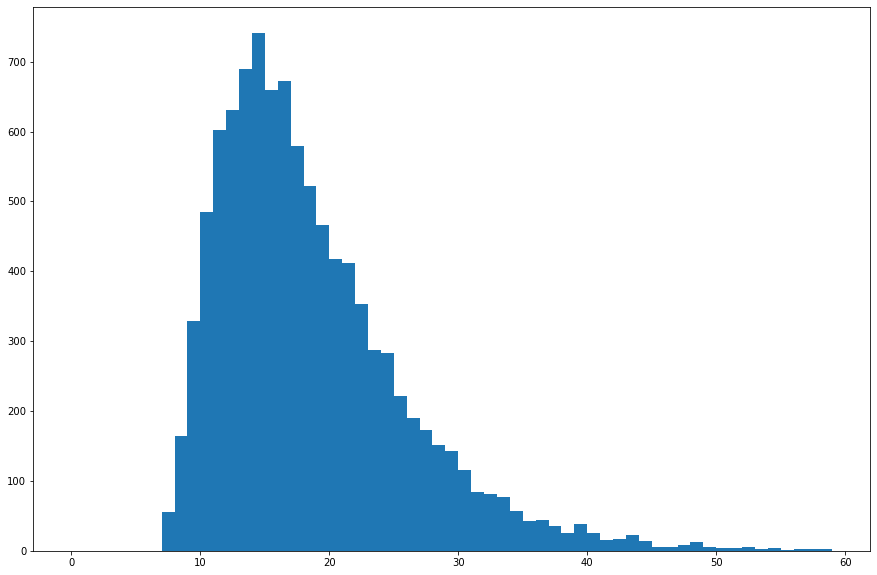

In [12]:
def doPickExperiment():
    marblePicks = np.zeros(7)
    for pick in range(1, 10000):
        pickedMarble=np.random.randint(7)
        marblePicks[pickedMarble]+=1
        if (marblePicks>0).sum()==7:
            return pick


results=[]
for experiment in range(10000):
    results.append(doPickExperiment())



plt.figure(figsize=[15,10])
plt.hist(results, bins=range(0,60) )

In [13]:
np.sum([1./(1-1.*i/7) for i in range(0,7) ])

18.149999999999995